In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
sns.set_style('whitegrid')

In [4]:
data_path = '..\\data\\'

In [5]:
X_train_val = np.load(data_path + 'features_train_val.npy')
y_train_val = np.load(data_path + 'y_train.npy')
X_test = np.load(data_path + 'features_test.npy')
y_test = np.load(data_path + 'y_test.npy')

In [6]:
X_train_val.shape

(7352, 117)

In [7]:
labels_train_val = np.array([np.where(r==1)[0][0] for r in y_train_val])

Воспользуемся методом главных компонент, чтобы снизить размерность данных до двух или трёх для последующей визуализации

In [8]:
pca_df = pd.DataFrame(columns=['comp1', 'comp2', 'comp3', 'label'])

In [9]:
pca_df['label'] = labels_train_val

Исключим категориальные предикторы

In [10]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_train_val[:, :-27])
pca_df['comp1'] = pca_result[:,0]
pca_df['comp2'] = pca_result[:,1] 
pca_df['comp3'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.80542109 0.05948897 0.04635567]


<AxesSubplot:xlabel='comp1', ylabel='comp2'>

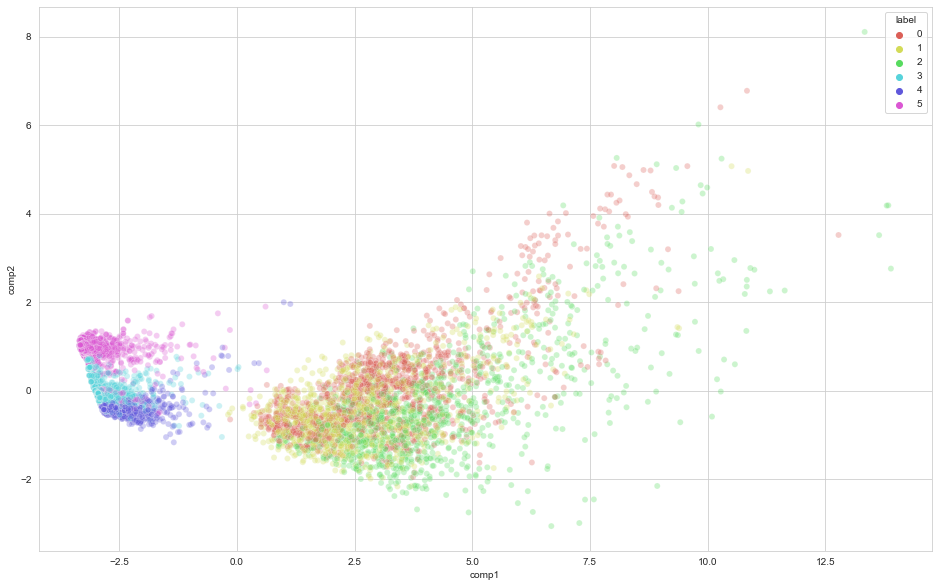

In [11]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="comp1", y="comp2",
    hue="label",
    palette=sns.color_palette("hls", 6),
    data=pca_df,
    legend="full",
    alpha=0.3
)

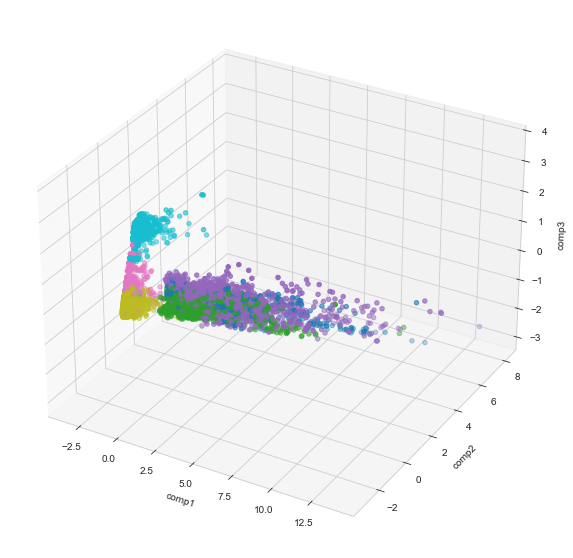

In [12]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=pca_df["comp1"], 
    ys=pca_df["comp2"], 
    zs=pca_df["comp3"], 
    c=pca_df["label"], 
    cmap='tab10'
)
ax.set_xlabel('comp1')
ax.set_ylabel('comp2')
ax.set_zlabel('comp3')
plt.show()

Воспользуемся методом t-SNE для аналогичной задачи снижения размерности и последующей визуализации

В данном случае оставим категориальные предикторы

In [13]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X_train_val)
print('t-SNE done!')

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.216s...
[t-SNE] Computed neighbors for 7352 samples in 9.282s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.054227
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.837128
[t-SNE] KL divergence after 300 iterations: 2.769580
t-SNE done!


In [14]:
tsne_df = pd.DataFrame(columns=['comp1', 'comp2', 'label'])

In [15]:
tsne_df['label'] = labels_train_val
tsne_df['comp1'] = tsne_results[:,0]
tsne_df['comp2'] = tsne_results[:,1]

<AxesSubplot:xlabel='comp1', ylabel='comp2'>

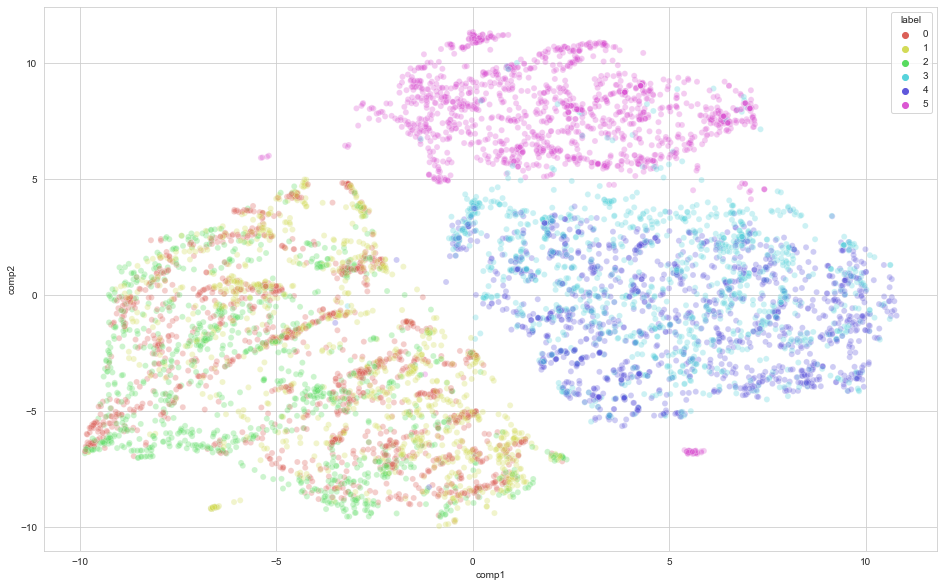

In [16]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="comp1", y="comp2",
    hue="label",
    palette=sns.color_palette("hls", 6),
    data=tsne_df,
    legend="full",
    alpha=0.3
)